# Finance Data  

In this project focus is on exploratory data analysis of stock prices of different banks during the financial crisis of 2008.  

## importing important libraries

In [1]:
# pip install pandas-datareader
# # /* use above command to install pandas datareader */
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [4]:
# another way
# df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [5]:
df.head()

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  33.364235  358.130737  101.857788  25.922325  35.224964   
2006-01-04  33.009911  351.518799  100.450882  25.772713  35.249126   
2006-01-05  33.052406  353.262604  100.411385  25.850782  35.345791   
2006-01-06  33.002819  353.262604  101.834106  26.032915  35.382023   
2006-01-09  33.024090  351.591522  103.059219  26.455732  35.756561   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.104458  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  19.871271  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  19.849211  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  19.965803  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  19.962654  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870960.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05  1143160.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06  1370210.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09  1680740.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

## Data

We will get stock information for the following banks using pandas datareader:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


### adding tickers to differentiate

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

### concatenating data together

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1,keys = tickers)

### Setting the column name levels

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364243  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009899  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052418  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002811  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024075  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224957  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249130  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345772  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382030  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756580  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104460  
2006-01-04   31.799999  31.530001  10870000.0  19.871269  
2006-01-05   31.500000  31.495001  10158000.0  19.849213  
2006-01-06   31.580000  31.680000   8403800.0  19.965805  
2006-01-09   31.674999  31.674999   5619600.0  19.962652  

[5 rows x 36 columns]

# EDA


### The max Closing price for each bank's stock throughout the time period

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [11]:
returns = pd.DataFrame()

### calculating return in percentage change

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


### pairplot demonstrating relation between 

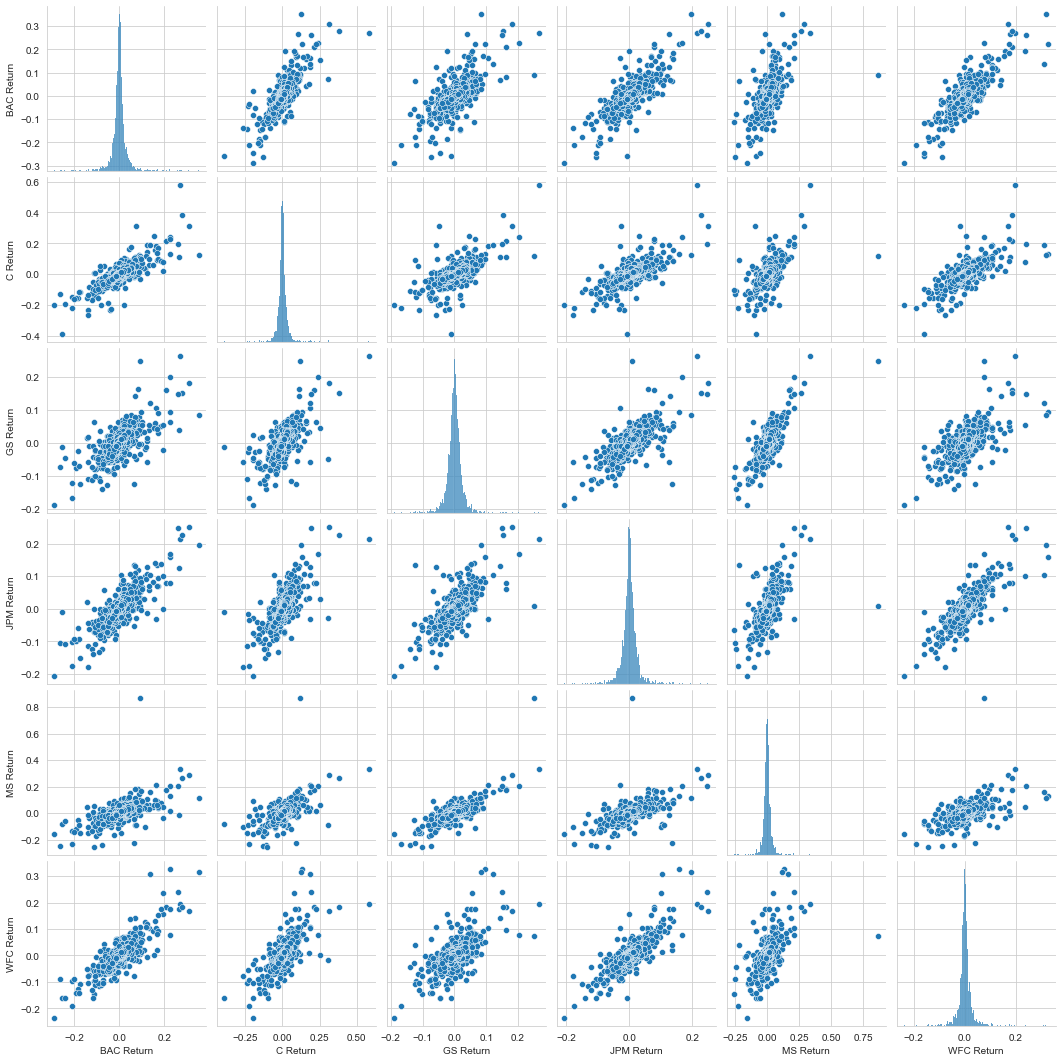

In [13]:
import seaborn as sns
sns.pairplot(returns[1:])

### checking for the day having worst return in the duration

In [14]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

### on this date citi bank stock crashed. 4 of them had worst hit on the same date 

### Best Single Day Gain

In [15]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

### Citigroup was the riskiest stock for the duration

In [16]:
returns.std() 

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

### In 2015 approximately all banks had similar amount of risk where Morgan Stanley was relatively risky followed by Bank of America

In [17]:
returns.loc['2015-01-01':'2015-12-31'].std() 

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

### lets check for 2015 Morgan Stanley data and check how did it deflected so much

C:\Users\patil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MS Return', ylabel='Density'>

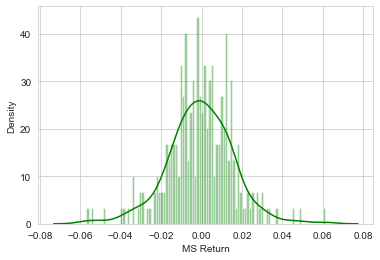

In [18]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

### Similarly for CitiGroup in 2008

<AxesSubplot:xlabel='C Return', ylabel='Count'>

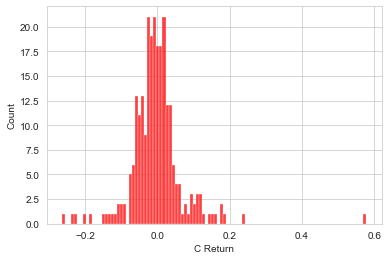

In [19]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

### Line plot showing Close price for each bank for the entire index of time

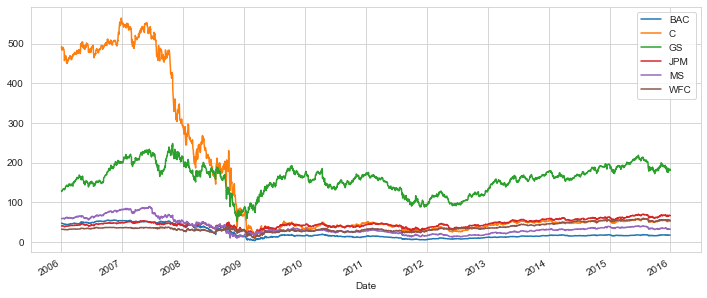

In [20]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,5),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

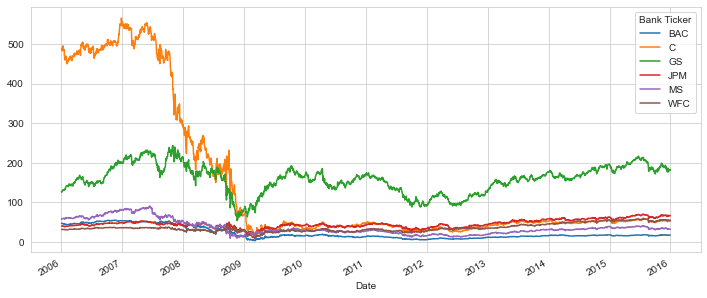

In [21]:
bank_stocks.xs(key='Open',axis=1,level='Stock Info').plot(figsize=(12,5),label=tick)

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

##  Moving Averages

### Let's analyze the moving averages for these stocks in the year 2008. 



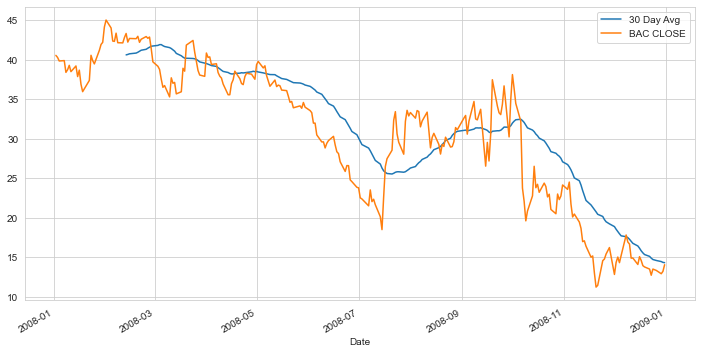

In [23]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

### rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

### heatmap showing correlation based on Closing price

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

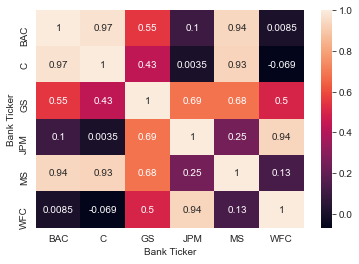

In [24]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

### Clustermap for above correlation based on stock info

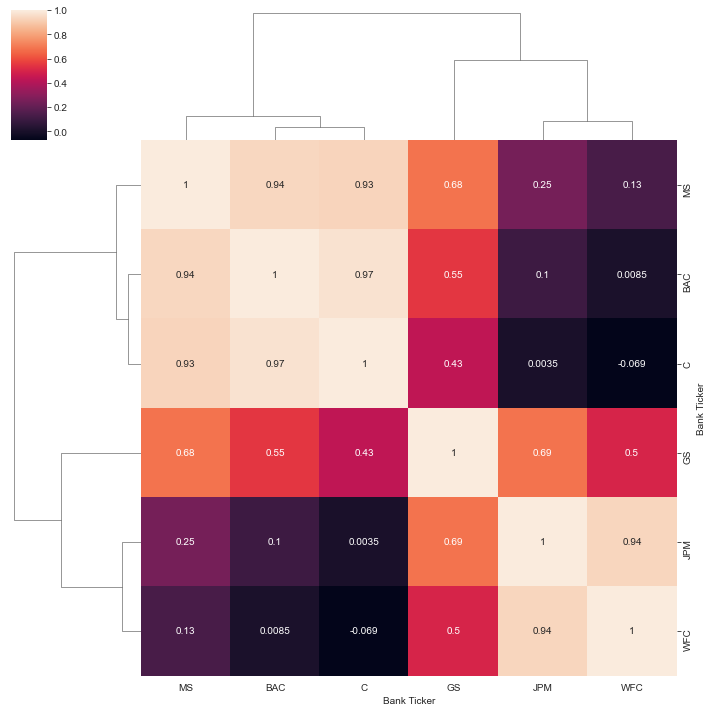

In [25]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [26]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='ylgnbu')

### Exploiting cufflinks and plotly for analytical plots

### candle kind plots

In [27]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

### Simple Moving Averages plot of Morgan Stanley for the year 2015

In [28]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

### Bollinger Band Plot for Bank of America for the year 2015

In [29]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# ******************************************** Thank You ********************************************